In [35]:
import numpy as np
import pandas as pd

from sklearn import datasets, tree, preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.2)

In [36]:
data = datasets.load_breast_cancer()

print(data.target)
print(data.feature_names)
print(data.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [37]:
label_encoder = preprocessing.LabelEncoder()

In [38]:
df = pd.DataFrame(data.data, columns=data.feature_names).assign(Species=data['target_names'][data.target])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Species
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [39]:
# assign x and y
x = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


In [40]:
# X, y = datasets.load_breast_cancer(return_X_y=True)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

[Text(0.6796875, 0.9375, 'X[22] <= 111.5\ngini = 0.469\nsamples = 455\nvalue = [171, 284]'),
 Text(0.515625, 0.8125, 'X[27] <= 0.16\ngini = 0.159\nsamples = 298\nvalue = [26, 272]'),
 Text(0.375, 0.6875, 'X[27] <= 0.136\ngini = 0.088\nsamples = 283\nvalue = [13, 270]'),
 Text(0.25, 0.5625, 'X[13] <= 45.17\ngini = 0.045\nsamples = 263\nvalue = [6, 257]'),
 Text(0.15625, 0.4375, 'X[23] <= 785.75\ngini = 0.023\nsamples = 256\nvalue = [3, 253]'),
 Text(0.0625, 0.3125, 'X[21] <= 33.35\ngini = 0.008\nsamples = 242\nvalue = [1, 241]'),
 Text(0.03125, 0.1875, 'gini = 0.0\nsamples = 225\nvalue = [0, 225]'),
 Text(0.09375, 0.1875, 'X[21] <= 33.8\ngini = 0.111\nsamples = 17\nvalue = [1, 16]'),
 Text(0.0625, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.125, 0.0625, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.25, 0.3125, 'X[3] <= 653.95\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(0.21875, 0.1875, 'X[5] <= 0.055\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0

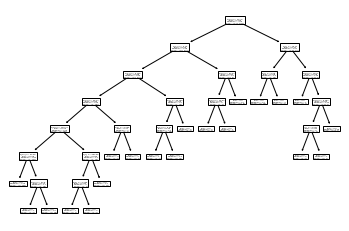

In [42]:

# Decision Tree Classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
tree.plot_tree(clf)

In [43]:
# Predict Data
y_pred = clf.predict(x_test)

In [48]:
print("Accuracy     : ",accuracy_score(y_test, y_pred))
print("Precision    : ", metrics.precision_score(y_test, y_pred))
print("Recall       :", metrics.recall_score(y_test, y_pred))

Accuracy     :  0.9210526315789473
Precision    :  0.9444444444444444
Recall       : 0.9315068493150684
